In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [99]:
dataset = load_digits()
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [100]:
dataset.data.shape

(1797, 64)

In [101]:
dataset.images.shape

(1797, 8, 8)

In [102]:
dataset.target.shape

(1797,)

In [103]:
dataset.data[100]
dataset.images[100]
dataset.target[100]

4

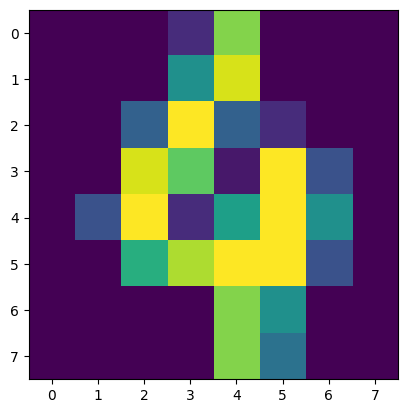

In [104]:
plt.imshow(dataset.images[100])

In [105]:
X=dataset.data
Y=dataset.target
Y=np.eye(10)[Y]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1437, 64), (360, 64), (1437, 10), (360, 10))

In [106]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

def softmax(X):
    return np.exp(X)/np.sum(np.exp(X))

def root_mean_square_error(Y_gt,Y_pred):
    return np.sqrt(np.mean((Y_gt-Y_pred)**2))

In [107]:
epochs=50
η=0.001 #learning rate

D_in=X_train.shape[1]
H1=128
H2=32
D_out=Y_train.shape[1] # =len(np.unique(Y_train))

In [108]:
W1=np.random.randn(D_in,H1)
W2=np.random.randn(H1,H2)
W3=np.random.randn(H2,D_out)
# len(W1)

In [109]:
B1=np.random.randn(1,H1)
B2=np.random.randn(1,H2)
B3=np.random.randn(1,D_out)

In [110]:
print(f"{'accuracy_train':^25}{'loss_train':^25}{'accuracy_test':^25}{'loss_test':^25}")
for epoch in range(epochs):

    # train
    Y_pred_train = []
    for x,y in zip(X_train,Y_train):

        x = x.reshape(-1,1)

        # forward

        # layer1
        out1 = sigmoid(x.T @ W1 + B1)

        # layer2
        out2 = sigmoid(out1 @ W2 + B2)

        # layer3
        out3 = softmax(out2 @ W3 + B3)
        y_pred = out3
        Y_pred_train.append(y_pred)

        # backward مشتق گیری و محاسبه گرادیان برای مرحله بعد

        # layer3
        # گرادیان = ارور * مشتق
        error = -2 * (y - y_pred)
        grad_B3 = error
        grad_W3 = out2.T @ error

        # layer2
        error = error @ W3.T * out2 *(1 - out2)
        grad_B2 = error
        grad_W2 = out1.T @ error

        # layer1

        error = error @ W2.T * out1 * (1 - out1)
        grad_B1 = error
        grad_W1 = x @ error

        # update

        # layer1
        W1 -= η * grad_W1
        B1 -= η * grad_B1

        # layer2
        W2 -= η * grad_W2
        B2 -= η * grad_B2

        # layer3
        W3 -= η * grad_W3
        B3 -= η * grad_B3

    # test
    Y_pred_test=[]
    for x,y in zip(X_test,Y_test):

        x = x.reshape(-1,1)

        # forward

        # layer1
        out1 = sigmoid(x.T @ W1 + B1)

        # layer2
        out2 = sigmoid(out1 @ W2 + B2)

        # layer3
        out3 = softmax(out2 @ W3 + B3)
        y_pred = out3
        Y_pred_test.append(y_pred)
        
        
    Y_pred_train = np.array(Y_pred_train).reshape(-1,10)
    loss_train=root_mean_square_error(Y_train,Y_pred_train)
    accuracy_train= np.sum(np.argmax(Y_train,axis=1)==np.argmax(Y_pred_train,axis=1))/len(Y_train)

    Y_pred_test = np.array(Y_pred_test).reshape(-1,10)
    loss_test=root_mean_square_error(Y_test,Y_pred_test)
    accuracy_test= np.sum(np.argmax(Y_test,axis=1)==np.argmax(Y_pred_test,axis=1))/len(Y_test)
    
    print(f"{accuracy_train:^25}{loss_train:^25}{accuracy_test:^25}{loss_test:^25}")


     accuracy_train             loss_train              accuracy_test              loss_test        
   0.20389700765483645      0.3162987540439739       0.33611111111111114      0.28757489721930796   
   0.38900487125956856      0.27684154496066427      0.3888888888888889       0.27375688797288106   
   0.4906054279749478       0.2583296561474144       0.46111111111111114      0.25986323180938803   
   0.5706332637439109       0.24289874282069826             0.525             0.24893522239919275   
    0.627000695894224       0.2295386796454842       0.5638888888888889       0.23933839450190678   
   0.6778009742519137       0.21811346894508785      0.6083333333333333       0.23078595109951527   
   0.7153792623521225       0.20831710743066548      0.6444444444444445       0.22288536466882652   
   0.7446068197633959       0.19910079404046468             0.675             0.21612577520877357   
   0.7717466945024356       0.19063919576539243             0.675              0.2108796358

In [123]:
import cv2

image = cv2.imread("test3.png")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image = image.reshape(64,1)

x = image
# forward

# layer1
out1 = sigmoid(x.T @ W1 + B1)

# layer2
out2 = sigmoid(out1 @ W2 + B2)

# layer3
out3 = softmax(out2 @ W3 + B3)
y_pred = out3

print(y_pred)
print(np.argmax(y_pred))

[[2.59494303e-03 1.85864490e-02 2.57232612e-02 3.03201194e-03
  2.52940274e-01 1.40941503e-05 3.03774277e-03 6.71069425e-01
  4.64393717e-04 2.25374053e-02]]
7
